In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [4]:
# convert to 1D array
print("Before:\n", y_train[:5])

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

print("After:\n", y_train[:5])

Before:
 [[6]
 [9]
 [9]
 [4]
 [1]]
After:
 [6 9 9 4 1]


In [6]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

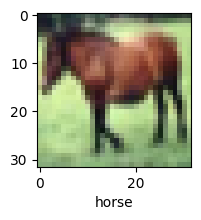

In [7]:
plot_sample(X_train, y_train, 7)

In [8]:
# Normalize the data
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

### Artificial Neural Network (ANN) 

In [9]:
ann = models.Sequential(
    [
        layers.Flatten(
            input_shape=(32, 32, 3)
        ),  # Flatten the 32x32x3 input image into a 1D array
        layers.Dense(3000, activation="relu"),  # 3000 neurons, ReLU activation
        layers.Dense(1000, activation="relu"),
        layers.Dense(
            10, activation="softmax"
        ),  # Output layer with 10 neurons (one for each class) and softmax activation
    ]
)

ann.compile(
    optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

ann.fit(X_train, y_train, epochs=5)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.2987 - loss: 1.9380
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4201 - loss: 1.6425
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.4534 - loss: 1.5524
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.4749 - loss: 1.4869
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.4942 - loss: 1.4348


In [10]:
y_pred = ann.predict(X_test)

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.43      0.53      1000
           1       0.65      0.58      0.61      1000
           2       0.46      0.15      0.23      1000
           3       0.36      0.21      0.26      1000
           4       0.43      0.44      0.43      1000
           5       0.30      0.54      0.38      1000
           6       0.46      0.68      0.55      1000
           7       0.52      0.58      0.55      1000
           8       0.52      0.71      0.60      1000
           9       0.62      0.49      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



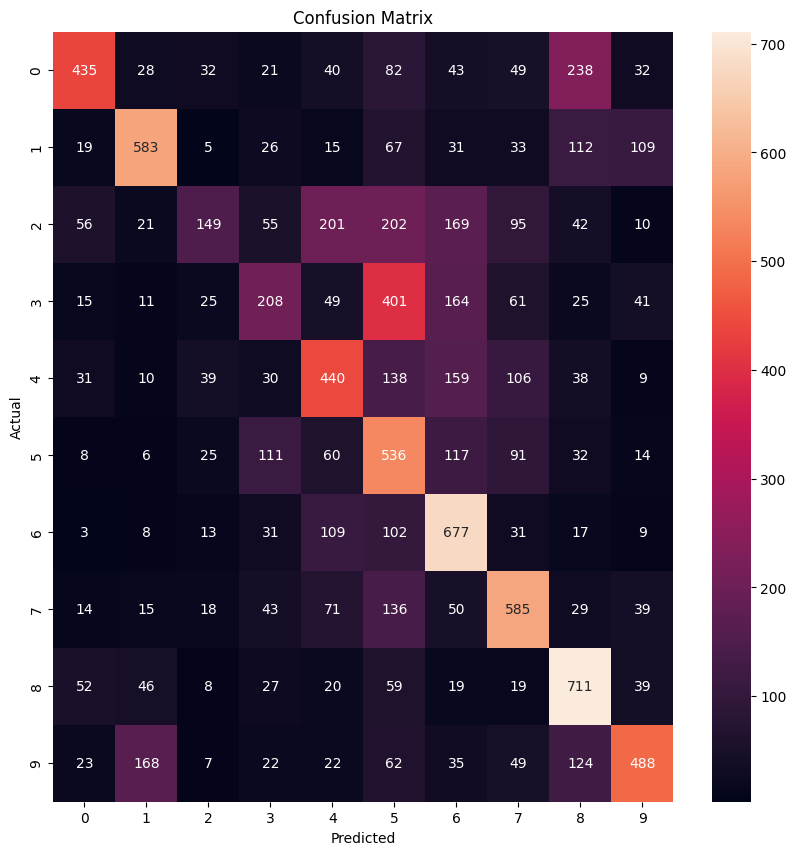

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt="d")

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

### Convolutional Neural Network (CNN)

In [26]:
cnn = models.Sequential(
    [
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [19]:
cnn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [20]:
cnn.fit(X_train, y_train, epochs=8)

Epoch 1/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.2067 - loss: 3.2164
Epoch 2/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.4436 - loss: 1.5255
Epoch 3/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5125 - loss: 1.3527
Epoch 4/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5495 - loss: 1.2632
Epoch 5/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5854 - loss: 1.1846
Epoch 6/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6011 - loss: 1.1425
Epoch 7/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6182 - loss: 1.1017
Epoch 8/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6330 - loss: 1.0533


In [21]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6580 - loss: 0.9895


[0.9946934580802917, 0.6549999713897705]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.09045524e-02, 3.89267877e-02, 3.41015346e-02, 3.76182854e-01,
        5.09107634e-02, 2.66605049e-01, 6.87775016e-02, 8.37284233e-03,
        1.18359104e-01, 2.68591251e-02],
       [2.32066184e-01, 2.47983932e-01, 7.95817177e-04, 9.31077811e-05,
        2.42005917e-05, 8.87708156e-05, 1.29523705e-05, 1.64519533e-05,
        4.81465816e-01, 3.74526866e-02],
       [1.85573250e-01, 2.28495955e-01, 1.77968796e-02, 5.77235641e-03,
        2.52534635e-03, 4.64845449e-03, 2.22379761e-03, 4.17355495e-03,
        3.75453621e-01, 1.73336744e-01],
       [8.46105933e-01, 7.83780310e-03, 1.88114550e-02, 1.54424203e-03,
        2.50151730e-03, 3.32916854e-04, 2.10423302e-03, 7.02142424e-04,
        1.18963793e-01, 1.09598762e-03],
       [4.46836726e-04, 3.97922791e-04, 7.82421082e-02, 4.53692814e-03,
        1.15634561e-01, 4.68298607e-03, 7.94858098e-01, 6.53841358e-04,
        3.93915601e-04, 1.52786248e-04]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [24]:
# Classification Report
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.75      0.71      1000
           1       0.79      0.80      0.79      1000
           2       0.55      0.44      0.49      1000
           3       0.60      0.23      0.34      1000
           4       0.51      0.72      0.60      1000
           5       0.49      0.68      0.57      1000
           6       0.74      0.73      0.73      1000
           7       0.71      0.73      0.72      1000
           8       0.80      0.73      0.76      1000
           9       0.78      0.74      0.76      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.66      0.65     10000



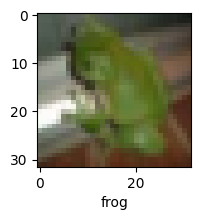

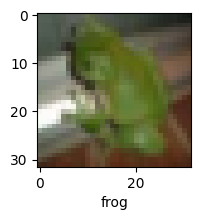

In [25]:
plot_sample(X_test, y_classes, 7)

plot_sample(X_test, y_test, 7)

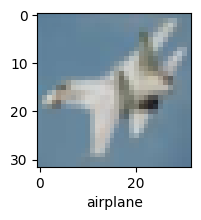

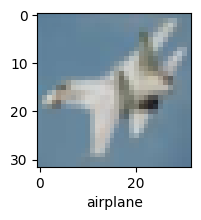

In [19]:
plot_sample(X_test, y_classes, 10)

plot_sample(X_test, y_test, 10)

### Transfer Learning (VGG16)

In [19]:
# Create VGG16 base model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

# Create new model on top
transfer_model = models.Sequential(
    [
        base_model,
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

# Compile model
transfer_model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
)

# Train with data augmentation
history = transfer_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,  
    validation_data=(X_test, y_test),
)

# Evaluate and plot results
y_pred = transfer_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(
    "\nTransfer Learning Model Classification Report:\n",
    classification_report(y_test, y_pred_classes),
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 172s 109ms/step - accuracy: 0.3822 - loss: 1.8113 - val_accuracy: 0.5518 - val_loss: 1.2948
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 182s 117ms/step - accuracy: 0.4798 - loss: 1.4733 - val_accuracy: 0.5611 - val_loss: 1.2485
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 184s 118ms/step - accuracy: 0.5044 - loss: 1.4154 - val_accuracy: 0.5689 - val_loss: 1.2455
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.5078 - loss: 1.4019 - val_accuracy: 0.5740 - val_loss: 1.2252
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.5151 - loss: 1.3882 - val_accuracy: 0.5794 - val_loss: 1.2018
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.5186 - loss: 1.3814 - val_accuracy: 0.5806 - val_loss: 1.2050
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.5233 - loss: 1.3533 - val_accuracy: 0.5822 - val_loss: 1.2003
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accurac

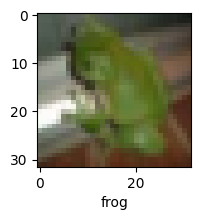

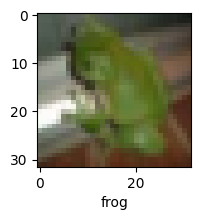

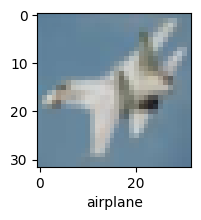

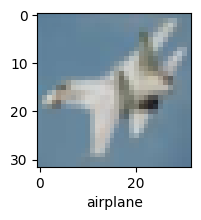

In [20]:
# Test
plot_sample(X_test, y_test, 7)
plot_sample(X_test, y_pred_classes, 7)

plot_sample(X_test, y_test, 10)
plot_sample(X_test, y_pred_classes, 10)